In [1]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
players = pd.read_csv(r'player_data_selected.csv')
players

C:\Users\shubhanshu gupta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (62,63,73,74,75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category
0,0,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
1,1,2008,Kaká,25,90,91,Milan,138449,182.9,161,Right,90,CAM,1,0,0,0,334,87,90,64,93,NaN,353,91,NaN,80,90,92,271,93,89,NaN,89,NaN,330,86,NaN,78,73,93,288,38,87,86,NaN,77,NaN,51,22,29,NaN,70,4,22,90,22,22,1697,470,4,1,NaN,NaN,4,91,89,89,91,42,68,1,CAM,NaN,NaN,NaN,2009,2009.0,1,Midfielder
2,2,2008,Diego,22,88,90,SV Werder Bremen,136138,172.7,161,Right,88,CAM,2,0,0,0,316,84,85,55,92,NaN,350,90,NaN,83,84,93,252,86,83,NaN,83,NaN,301,82,NaN,78,62,79,298,64,80,83,NaN,71,NaN,66,25,41,NaN,75,9,22,84,22,22,1658,455,4,1,NaN,NaN,3,84,82,87,90,45,67,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
3,3,2008,S. Nasri,20,85,90,Olympique de Marseille,165239,177.8,165,Right,85,CAM,5,0,0,0,310,77,76,67,90,NaN,334,88,NaN,75,84,87,247,82,81,NaN,84,NaN,299,76,NaN,75,69,79,300,64,89,80,NaN,67,NaN,84,37,47,NaN,75,12,21,84,21,21,1649,453,4,1,NaN,NaN,3,81,77,84,87,54,70,1,CAM,NaN,NaN,NaN,2009,2009.0,1,Midfielder
4,4,2008,Deco,29,85,90,FC Barcelona,53769,177.8,161,Right,85,CAM,5,0,0,0,305,82,74,58,91,NaN,342,82,NaN,84,86,90,254,86,81,NaN,87,NaN,314,74,NaN,82,72,86,332,71,89,84,NaN,88,NaN,47,25,22,NaN,75,12,21,86,21,21,1669,449,4,1,NaN,NaN,4,83,78,87,86,40,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233658,233658,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,Left,60,LWB,17,250000,500,519000,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,High,Medium,1,73,37,52,62,50,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender
233659,233659,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,Left,60,LWB,17,240000,500,450000,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,65.0,76,56,29,230,52,54,55,38.0,31,41.0,163,55,56,52.0,50,8,10,11,11,10,1448,321,3,2,Medium,Medium,1,73,29,48,57,53,61,1,LB,NaN,NaN,NaN,2018,2020.0,0,Defender
233660,233660,2020,L. Obexer,22,57,68,FC Lugano,233502,177.8,159,Left,58,LWB,11,160000,1000,0,218,54,36,50,47,31.0,214,59,36.0,30,39,50,323,68,66,58.0,55,76.0,250,34,62.0,65,60,29,238,55,52,51,40.0,40,41.0,166,52,58,56.0,45,14,12,8,5,6,1454,317,3,2,Medium,Medium,1,67,35,44,57,54,60,2,LWB,LB,NaN,NaN,"Jun 30, 2020 On Loan",2020.0,0,Defender
233661,233661,2020,R. Donelon,23,57,62,Sligo Rovers,223091,170.2,157,Left,59,LWB,5,120000,500,195000,197,58,22,42,56,19.0,291,57,59.0,66,54,55,321,63,66,68.0,45,79.0,291,45,66.0,74,56,50,246,49,52,58,52.0,35,57.0,164,55,53,56.0,63,14,14,12,9,14,1573,327,2,2,High,Medium,1,65,35,56,58,53,60,3,LB,LWB,LM,NaN,2013,2020.0,0,Defender


In [4]:
players.drop('Unnamed: 0',axis=1,inplace=True)

## Clustering players based on the most recent stats i.e. stats from 2020

In [5]:
players_recent = players[players["Year"].isin([2020])]
players_recent

,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category
17139,2020,K. De Bruyne,28,91,91,Manchester City,192985,180.3,154,Right,91,CAM,0,90000000,370000,1665000000,405,94,82,55,92,82.0,437,87,85.0,83,91,91,398,77,76,78.0,91,76.0,407,91,63.0,89,74,90,403,76,63,88,94.0,82,91.0,183,68,62,53.0,56,15,13,5,10,13,2289,481,5,4,High,High,4,76,86,92,87,62,78,2,CAM,CM,NaN,NaN,2015,2023.0,3,Midfielder
17140,2020,David Silva,33,88,88,Manchester City,168542,172.7,148,Left,88,CAM,0,36000000,260000,666000000,383,84,72,53,92,82.0,421,87,82.0,77,84,91,391,68,61,86.0,89,87.0,329,72,64.0,72,48,73,360,56,50,88,91.0,75,92.0,140,58,53,29.0,46,6,15,7,6,12,2070,422,2,4,High,Medium,4,64,74,88,88,52,56,2,CAM,CM,NaN,NaN,2010,2020.0,0,Midfielder
17141,2020,Bernardo Silva,24,87,90,Manchester City,218667,172.7,141,Left,89,CAM,3,64000000,210000,1232000000,371,85,79,51,86,70.0,411,92,84.0,67,76,92,434,85,78,94.0,85,92.0,350,76,51.0,93,54,76,356,69,49,85,85.0,68,87.0,148,49,59,40.0,54,9,10,14,12,9,2124,451,3,4,High,High,2,81,77,83,92,51,67,3,RW,CAM,CM,NaN,2017,2024.0,4,Midfielder
17142,2020,P. Dybala,25,87,90,Juventus,211110,177.8,165,Left,90,CAM,3,645000000,195000,1113000000,405,82,84,64,87,88.0,434,90,88.0,88,75,93,430,88,82,91.0,84,85.0,381,80,75.0,79,61,86,348,48,42,85,87.0,86,84.0,120,32,48,40.0,26,5,4,4,5,8,2144,450,3,4,Medium,Medium,3,85,84,84,90,43,64,2,CF,CAM,NaN,NaN,2015,2022.0,2,Midfielder
17143,2020,C. Eriksen,27,87,87,Inter,190460,180.3,168,Right,87,CAM,0,525000000,125000,893000000,385,86,77,52,90,80.0,432,78,89.0,85,89,91,392,75,71,79.0,87,80.0,372,84,50.0,92,57,89,344,46,56,85,90.0,67,88.0,138,59,57,22.0,43,9,14,7,7,6,2106,442,5,4,High,High,3,73,81,89,83,53,63,3,CAM,CM,RM,NaN,2020,2024.0,4,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233658,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,Left,60,LWB,17,250000,500,519000,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,High,Medium,1,73,37,52,62,50,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender
233659,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,Left,60,LWB,17,240000,500,450000,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,65.0,76,56,29,230,52,54,55,38.0,31,41.0,163,55,56,52.0,50,8,10,11,11,10,1448,321,3,2,Medium,Medium,1,73,29,48,57,53,61,1,LB,NaN,NaN,NaN,2018,2020.0,0,Defender
233660,2020,L. Obexer,22,57,68,FC Lugano,233502,177.8,159,Left,58,LWB,11,160000,1000,0,218,54,36,50,47,31.0,214,59,36.0,30,39,50,323,68,66,58.0,55,76.0,250,34,62.0,65,60,29,238,55,52,51,40.0,40,41.0,166,52,58,56.0,45,14,12,8,5,6,1454,317,3,2,Medium,Medium,1,67,35,44,57,54,60,2,LWB,LB,NaN,NaN,"Jun 30, 2020 On Loan",2020.0,0,Defender
233661,2020,R. Donelon,23,57,62,Sligo Rovers,223091,170.2,157,Left,59,LWB,5,120000,500,195000,197,58,22,42,56,19.0,291,57,59.0,66,54,55,321,63,66,68.0,45,79.0,291,45,66.0,74,56,50,246,49,52,58,52.

In [6]:
missing_Values_Columns = players_recent.isnull().sum(axis = 0)
missing_Values_Percentage = missing_Values_Columns * 100/players_recent.shape[0]
missing_Value_df = missing_Values_Percentage.to_frame()
missing_Value_df[missing_Value_df[0] > 0]

,0
Position 2,49.800000
Position 3,85.444444
Position 4,100.000000


In [7]:
# Checking unique players in the dataset
players_recent['Name'].nunique()

16912

There are 18000 rows but only 16912 unique players. So, some players have multiple rows

In [8]:
players_recent['Name'].value_counts()

J. Rodríguez     12
Paulinho          9
J. Martínez       7
J. Sánchez        7
J. García         7
                 ..
M. Solomon        1
M. El Idrissy     1
N. Hauptmann      1
E. Brignola       1
B. Collins        1
Name: Name, Length: 16912, dtype: int64

In [9]:
players_recent[players_recent['Name'] == 'J. Rodríguez']

,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category
17159,2020,J. Rodríguez,27,84,84,Real Madrid,198710,180.3,165,Left,84,CAM,0,325000000,200000,666000000,409,90,84,62,83,90.0,432,86,89.0,86,81,90,349,57,53,79.0,84,76.0,353,86,46.0,65,64,92,359,60,55,80,83.0,81,87.0,137,52,41,44.0,64,15,15,15,5,14,2103,425,2,4,Medium,Medium,4,55,86,85,86,50,63,3,CAM,CM,RM,NaN,2014,2020.0,0,Midfielder
17788,2020,J. Rodríguez,26,71,72,Once Caldas,214485,180.3,154,Right,73,CAM,1,27000000,3000,38000000,301,71,67,42,76,45.0,327,69,61.0,52,74,71,356,75,70,78.0,68,65.0,348,65,68.0,80,72,63,299,48,37,70,77.0,67,67.0,133,45,42,46.0,64,14,14,9,13,14,1828,391,3,3,Medium,Medium,1,72,65,73,70,42,69,1,CM,NaN,NaN,NaN,2018,2024.0,4,Midfielder
19114,2020,J. Rodríguez,20,58,65,Emelec,255721,175.3,154,Right,60,CAM,7,180000,500,423000,253,50,57,41,62,43.0,248,60,39.0,38,56,55,323,62,68,66.0,60,67.0,269,48,60.0,55,52,54,238,38,55,52,52.0,41,41.0,145,38,58,49.0,49,10,14,5,14,6,1525,330,2,2,Medium,Medium,1,65,53,54,59,49,50,1,CM,NaN,NaN,NaN,2020,2023.0,3,Midfielder
68112,2020,J. Rodríguez,25,76,79,Cruz Azul,223816,177.8,170,Right,77,ST,3,10000000,27000,178000000,342,62,78,65,67,70.0,327,77,58.0,62,55,75,400,87,84,81.0,72,76.0,377,78,70.0,85,75,69,314,68,35,78,57.0,76,69.0,108,23,40,45.0,53,12,14,10,7,10,1921,413,3,3,High,Medium,1,85,76,62,77,37,76,2,ST,LW,NaN,NaN,2019,2024.0,4,Forward
94479,2020,J. Rodríguez,26,72,75,Guadalajara,192009,185.4,187,Right,72,GK,3,28000000,19000,5000000,97,15,11,11,49,11.0,91,10,12.0,11,35,23,299,58,56,57.0,70,58.0,249,50,74.0,37,78,10,121,31,15,10,44.0,21,50.0,39,16,11,12.0,352,72,70,66,72,72,1248,409,3,1,Medium,Medium,1,72,70,66,72,57,72,1,GK,NaN,NaN,NaN,2012,2020.0,0,GoalKeeper
140182,2020,J. Rodríguez,25,75,80,Defensa y Justicia,244950,188.0,168,Right,76,CB,5,8000000,12000,126000000,247,37,31,75,71,33.0,259,57,41.0,35,61,65,315,65,71,55.0,69,55.0,325,53,81.0,71,85,35,279,69,71,39,53.0,47,69.0,221,73,75,73.0,54,13,14,12,7,8,1700,373,4,2,Medium,High,1,68,38,56,60,73,78,1,CB,NaN,NaN,NaN,2019,2020.0,0,Defender
154983,2020,J. Rodríguez,29,72,72,FC Botoşani,248009,172.7,148,Right,72,CM,0,3000000,9000,41000000,312,75,62,40,77,58.0,377,68,82.0,75,78,74,347,67,65,74.0,65,76.0,334,70,62.0,80,55,67,327,58,60,62,75.0,72,65.0,159,54,55,50.0,44,14,6,7,9,8,1900,395,3,3,Medium,Medium,1,66,65,77,71,54,62,2,CM,CDM,NaN,NaN,2017,2021.0,1,Midfielder
155004,2020,J. Rodríguez,23,71,76,Club Atlético Banfield,224796,177.8,176,Right,74,CM,5,31000000,9000,49000000,303,50,62,73,71,47.0,280,63,33.0,35,73,76,292,55,63,54.0,72,48.0,366,66,81.0,74,81,64,310,67,76,64,66.0,37,66.0,205,69,72,64.0,55,7,12,15,15,6,1811,395,2,2,Low,High,1,59,61,62,66,71,76,1,CM,NaN,NaN,NaN,2014,2021.0,1,Midfielder
178915,2020,J. Rodríguez,23,73,79,Club León,237131,170.2,134,Left,74,CDM,6,5000000,19000,95000000,269,55,33,58,77,46.0,300,59,47.0,44,74,76,359,69,69,70.0,65,86.0,312,58,64.0,72,70,48,312,72,68,55,64.0,53,62.0,217,74,71,72.0,49,10,9,8,8,14,1818,387,3,2,Medium,Medium,1,69,44,66,67,70,71,1,CDM,NaN,NaN,NaN,2017,2022.0,2,Midfielder
200217,2020,J. Rodríguez,20,58,67,U.N.A.M.,254594,177.8,130,Left,59,LB,9,180000,2000,342000,219,57,38,44,50,30.0,199,47,34.0,31,49,38,380,88,85,80.0,49,78.0,282,50,64.0,81

It shows multiple players with same name so the data is correct

#### Keeping only features related to the skillset of the players

In [10]:
players_recent.columns

Index(['Year', 'Name', 'Age', 'Rating', 'Potential', 'Team', 'ID', 'Height',
       'Weight', 'Foot', 'Best Overall', 'Best Position', 'Growth', 'Value',
       'Wage', 'Release Clause', 'Total Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Total Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Total Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Total Power', 'Short Power', 'Jumping',
       'Stamina', 'Strength', 'Long Shots', 'Total Mentality', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Total Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Total GK', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'Weak Foot', 'Skill Moves',
       'Attacking Work Rate', 'Defensive Work Rate',
       'International Reputation', 'PAC', 'SHO

In [11]:
players_updated = players_recent.copy()

In [12]:
players_updated.drop(['Year', 'Name','Team', 'ID','Value','Wage', 'Release Clause','Position 2', 'Position 3',
       'Position 4', 'Contract Start Date', 'Contract End Date','Contract Remaining','Foot', 'Best Position','Position 1',
                     'Attacking Work Rate', 'Defensive Work Rate','Category'],axis = 1, inplace= True)

In [13]:
players_updated

,Age,Rating,Potential,Height,Weight,Best Overall,Growth,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions
17139,28,91,91,180.3,154,91,0,405,94,82,55,92,82.0,437,87,85.0,83,91,91,398,77,76,78.0,91,76.0,407,91,63.0,89,74,90,403,76,63,88,94.0,82,91.0,183,68,62,53.0,56,15,13,5,10,13,2289,481,5,4,4,76,86,92,87,62,78,2
17140,33,88,88,172.7,148,88,0,383,84,72,53,92,82.0,421,87,82.0,77,84,91,391,68,61,86.0,89,87.0,329,72,64.0,72,48,73,360,56,50,88,91.0,75,92.0,140,58,53,29.0,46,6,15,7,6,12,2070,422,2,4,4,64,74,88,88,52,56,2
17141,24,87,90,172.7,141,89,3,371,85,79,51,86,70.0,411,92,84.0,67,76,92,434,85,78,94.0,85,92.0,350,76,51.0,93,54,76,356,69,49,85,85.0,68,87.0,148,49,59,40.0,54,9,10,14,12,9,2124,451,3,4,2,81,77,83,92,51,67,3
17142,25,87,90,177.8,165,90,3,405,82,84,64,87,88.0,434,90,88.0,88,75,93,430,88,82,91.0,84,85.0,381,80,75.0,79,61,86,348,48,42,85,87.0,86,84.0,120,32,48,40.0,26,5,4,4,5,8,2144,450,3,4,3,85,84,84,90,43,64,2
17143,27,87,87,180.3,168,87,0,385,86,77,52,90,80.0,432,78,89.0,85,89,91,392,75,71,79.0,87,80.0,372,84,50.0,92,57,89,344,46,56,85,90.0,67,88.0,138,59,57,22.0,43,9,14,7,7,6,2106,442,5,4,3,73,81,89,83,53,63,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233658,19,58,75,172.7,152,60,17,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,1,73,37,52,62,50,57,2
233659,18,58,75,177.8,150,60,17,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,65.0,76,56,29,230,52,54,55,38.0,31,41.0,163,55,56,52.0,50,8,10,11,11,10,1448,321,3,2,1,73,29,48,57,53,61,1
233660,22,57,68,177.8,159,58,11,218,54,36,50,47,31.0,214,59,36.0,30,39,50,323,68,66,58.0,55,76.0,250,34,62.0,65,60,29,238,55,52,51,40.0,40,41.0,166,52,58,56.0,45,14,12,8,5,6,1454,317,3,2,1,67,35,44,57,54,60,2
233661,23,57,62,170.2,157,59,5,197,58,22,42,56,19.0,291,57,59.0,66,54,55,321,63,66,68.0,45,79.0,291,45,66.0,74,56,50,246,49,52,58,52.0,35,57.0,164,55,53,56.0,63,14,14,12,9,14,1573,327,2,2,1,65,35,56,58,53,60,3


In [14]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
player_scaled = StandardScaler().fit_transform(players_updated)
player_scaled_df = pd.DataFrame(player_scaled)

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [16]:
pca = PCA(n_components = 3) # 2D PCA for the plot
player_reduced_df = pd.DataFrame(pca.fit_transform(player_scaled_df))

In [17]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 50,
    "max_iter": 300,
    "random_state": 42,
}


In [18]:
## Elbow method

wss = []
sse = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(player_reduced_df)
    wss.append(sum(np.min(cdist(player_reduced_df, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / player_reduced_df.shape[0])
    sse.append(kmeans.inertia_)

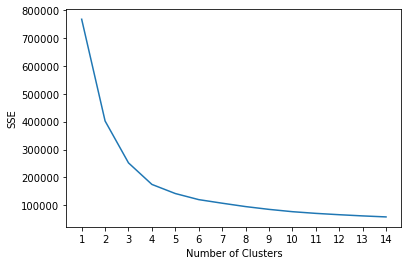

In [19]:
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

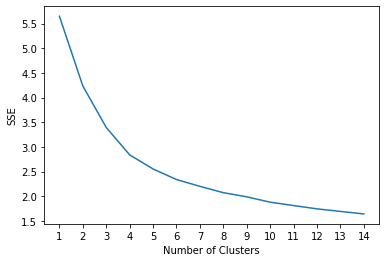

In [20]:
plt.plot(range(1, 15), wss)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
from kneed import KneeLocator

In [22]:
kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [23]:
kl = KneeLocator(range(1, 15), wss, curve="convex", direction="decreasing")
kl.elbow

4

In [24]:
kmeans = KMeans(n_clusters=4,**kmeans_kwargs)
kmeans.fit(player_reduced_df)
players_recent['cluster'] = kmeans.predict(player_reduced_df)

C:\Users\shubhanshu gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
names = players_recent['Name']
names = names.reset_index()['Name']
names

0          K. De Bruyne
1           David Silva
2        Bernardo Silva
3             P. Dybala
4            C. Eriksen
              ...      
17995        L. Klassen
17996           J. King
17997         L. Obexer
17998        R. Donelon
17999       T. Clifford
Name: Name, Length: 18000, dtype: object

In [26]:
kmeans_df = player_reduced_df.copy()
kmeans_df['cluster'] = kmeans.labels_
kmeans_df['name'] =  names
kmeans_df.rename(columns={0: 'PC1', 1: 'PC2',2: 'PC3'}, inplace=True)

In [27]:
kmeans_df

,PC1,PC2,PC3,cluster,name
0,-12.131094,4.507855,8.072578,2,K. De Bruyne
1,-9.454988,5.084258,5.152040,2,David Silva
2,-10.028087,5.347157,3.626011,2,Bernardo Silva
3,-10.735871,6.189189,4.198654,2,P. Dybala
4,-10.122814,5.329955,5.109055,2,C. Eriksen
...,...,...,...,...,...
17995,1.296339,-1.177813,-4.553501,3,L. Klassen
17996,2.515457,-2.407554,-4.493739,1,J. King
17997,2.500047,-2.491886,-4.148017,1,L. Obexer
17998,0.830599,-1.545832,-3.560890,3,R. Donelon


In [28]:
players_recent

,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category,cluster
17139,2020,K. De Bruyne,28,91,91,Manchester City,192985,180.3,154,Right,91,CAM,0,90000000,370000,1665000000,405,94,82,55,92,82.0,437,87,85.0,83,91,91,398,77,76,78.0,91,76.0,407,91,63.0,89,74,90,403,76,63,88,94.0,82,91.0,183,68,62,53.0,56,15,13,5,10,13,2289,481,5,4,High,High,4,76,86,92,87,62,78,2,CAM,CM,NaN,NaN,2015,2023.0,3,Midfielder,2
17140,2020,David Silva,33,88,88,Manchester City,168542,172.7,148,Left,88,CAM,0,36000000,260000,666000000,383,84,72,53,92,82.0,421,87,82.0,77,84,91,391,68,61,86.0,89,87.0,329,72,64.0,72,48,73,360,56,50,88,91.0,75,92.0,140,58,53,29.0,46,6,15,7,6,12,2070,422,2,4,High,Medium,4,64,74,88,88,52,56,2,CAM,CM,NaN,NaN,2010,2020.0,0,Midfielder,2
17141,2020,Bernardo Silva,24,87,90,Manchester City,218667,172.7,141,Left,89,CAM,3,64000000,210000,1232000000,371,85,79,51,86,70.0,411,92,84.0,67,76,92,434,85,78,94.0,85,92.0,350,76,51.0,93,54,76,356,69,49,85,85.0,68,87.0,148,49,59,40.0,54,9,10,14,12,9,2124,451,3,4,High,High,2,81,77,83,92,51,67,3,RW,CAM,CM,NaN,2017,2024.0,4,Midfielder,2
17142,2020,P. Dybala,25,87,90,Juventus,211110,177.8,165,Left,90,CAM,3,645000000,195000,1113000000,405,82,84,64,87,88.0,434,90,88.0,88,75,93,430,88,82,91.0,84,85.0,381,80,75.0,79,61,86,348,48,42,85,87.0,86,84.0,120,32,48,40.0,26,5,4,4,5,8,2144,450,3,4,Medium,Medium,3,85,84,84,90,43,64,2,CF,CAM,NaN,NaN,2015,2022.0,2,Midfielder,2
17143,2020,C. Eriksen,27,87,87,Inter,190460,180.3,168,Right,87,CAM,0,525000000,125000,893000000,385,86,77,52,90,80.0,432,78,89.0,85,89,91,392,75,71,79.0,87,80.0,372,84,50.0,92,57,89,344,46,56,85,90.0,67,88.0,138,59,57,22.0,43,9,14,7,7,6,2106,442,5,4,High,High,3,73,81,89,83,53,63,3,CAM,CM,RM,NaN,2020,2024.0,4,Midfielder,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233658,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,Left,60,LWB,17,250000,500,519000,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,High,Medium,1,73,37,52,62,50,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender,3
233659,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,Left,60,LWB,17,240000,500,450000,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,65.0,76,56,29,230,52,54,55,38.0,31,41.0,163,55,56,52.0,50,8,10,11,11,10,1448,321,3,2,Medium,Medium,1,73,29,48,57,53,61,1,LB,NaN,NaN,NaN,2018,2020.0,0,Defender,1
233660,2020,L. Obexer,22,57,68,FC Lugano,233502,177.8,159,Left,58,LWB,11,160000,1000,0,218,54,36,50,47,31.0,214,59,36.0,30,39,50,323,68,66,58.0,55,76.0,250,34,62.0,65,60,29,238,55,52,51,40.0,40,41.0,166,52,58,56.0,45,14,12,8,5,6,1454,317,3,2,Medium,Medium,1,67,35,44,57,54,60,2,LWB,LB,NaN,NaN,"Jun 30, 2020 On Loan",2020.0,0,Defender,1
233661,2020,R. Donelon,23,57,62,Sligo Rovers,223091,170.2,157,Left,59,LWB,5,120000,500,195000,197,58,22,42,56,19.0,291,57,59.0,66,54,55,321,63,66,68.0,45,79.0,291,45,66

In [34]:
# Getting similar players based on valuation and potential
def find_similar_players(player,num_results,value_fraction,potential_fraction):
    player_details = players_recent[players_recent['Name'] == player][['cluster1','Value','Potential']]
    player_val = player_details['Value'].values[0]
    player_pot = player_details['Potential'].values[0]
    replacement_df = players_recent[(players_recent['cluster1'] == player_details['cluster1'].values[0]) & ~(players_recent['Name'] == player)]    
    replacement_df = replacement_df[replacement_df['Value'].between(player_val * (1 - value_fraction),player_val * (1 + value_fraction),inclusive = True)]   
    replacement_df = replacement_df[replacement_df['Potential'].between(player_pot * (1 - potential_fraction),player_pot * (1 + potential_fraction),inclusive = True)][['Name', 'Age','Rating','Potential', 'Team', 'Value', 'Wage', 'Position 1','Category']]
    display(replacement_df.sort_values(by='Potential', ascending=False).head(num_results))

In [35]:
for p in ['L. Messi', 'De Gea', 'M. Salah', 'G. Chiellini', 'N. Kanté']:
    print("10 similar players for {}".format(p))
    find_similar_players(p,10,0.5,0.05)

10 similar players for L. Messi


,Name,Age,Rating,Potential,Team,Value,Wage,Position 1,Category
67912,K. Mbappé,20,89,95,Paris Saint-Germain,935000000,150000,ST,Forward
17145,J. Sancho,19,86,94,Borussia Dortmund,635000000,72000,RM,Midfielder
17154,K. Havertz,20,84,93,Bayer 04 Leverkusen,485000000,70000,CAM,Midfielder
67909,Cristiano Ronaldo,34,93,93,Juventus,585000000,410000,ST,Forward
205910,Neymar Jr,27,92,92,Paris Saint-Germain,1055000000,290000,LW,Forward
205913,R. Sterling,24,89,91,Manchester City,825000000,260000,LW,Forward
205914,L. Sané,23,86,91,Manchester City,595000000,195000,LW,Forward
17142,P. Dybala,25,87,90,Juventus,645000000,195000,CF,Midfielder
154643,Arthur,22,85,90,FC Barcelona,505000000,190000,CM,Midfielder
205912,S. Mané,27,90,90,Liverpool,805000000,240000,LW,Forward


10 similar players for De Gea


,Name,Age,Rating,Potential,Team,Value,Wage,Position 1,Category
94156,G. Donnarumma,20,85,92,Milan,415000000,34000,GK,GoalKeeper
94145,Alisson,26,90,91,Liverpool,645000000,160000,GK,GoalKeeper
94148,Ederson,25,88,91,Manchester City,545000000,185000,GK,GoalKeeper
94153,W. Szczęsny,29,87,89,Juventus,425000000,145000,GK,GoalKeeper
94152,K. Navas,32,87,87,Paris Saint-Germain,305000000,110000,GK,GoalKeeper
94154,H. Lloris,32,87,87,Tottenham Hotspur,305000000,125000,GK,GoalKeeper
94158,B. Leno,27,85,87,Arsenal,325000000,99000,GK,GoalKeeper


10 similar players for M. Salah


,Name,Age,Rating,Potential,Team,Value,Wage,Position 1,Category
230287,L. Messi,32,94,94,FC Barcelona,955000000,560000,RW,Forward
17145,J. Sancho,19,86,94,Borussia Dortmund,635000000,72000,RM,Midfielder
17154,K. Havertz,20,84,93,Bayer 04 Leverkusen,485000000,70000,CAM,Midfielder
67909,Cristiano Ronaldo,34,93,93,Juventus,585000000,410000,ST,Forward
205910,Neymar Jr,27,92,92,Paris Saint-Germain,1055000000,290000,LW,Forward
205914,L. Sané,23,86,91,Manchester City,595000000,195000,LW,Forward
205913,R. Sterling,24,89,91,Manchester City,825000000,260000,LW,Forward
67925,L. Martínez,21,84,91,Inter,445000000,79000,ST,Forward
154643,Arthur,22,85,90,FC Barcelona,505000000,190000,CM,Midfielder
205912,S. Mané,27,90,90,Liverpool,805000000,240000,LW,Forward


10 similar players for G. Chiellini


,Name,Age,Rating,Potential,Team,Value,Wage,Position 1,Category
154751,S. Tonali,19,77,91,Brescia,18000000,8000,CDM,Midfielder
154869,E. Camavinga,16,74,90,Stade Rennais FC,11000000,4000,CM,Midfielder
139866,D. Upamecano,20,80,89,RB Leipzig,21000000,38000,CB,Defender
139819,A. Romagnoli,24,83,89,Milan,32000000,46000,CB,Defender
139832,J. Gomez,22,82,89,Liverpool,28000000,85000,CB,Defender
139846,Éder Militão,21,81,88,Real Madrid,23000000,100000,CB,Defender
139889,I. Konaté,20,79,88,RB Leipzig,18000000,36000,CB,Defender
140197,W. Saliba,18,74,88,AS Saint-Étienne,11000000,7000,CB,Defender
139848,Mario Hermoso,24,81,87,Atlético Madrid,22000000,49000,CB,Defender
139874,A. Christensen,23,80,87,Chelsea,19000000,85000,CB,Defender


10 similar players for N. Kanté


,Name,Age,Rating,Potential,Team,Value,Wage,Position 1,Category
139789,V. van Dijk,27,91,92,Liverpool,90000000,240000,CB,Defender
154639,F. de Jong,22,86,92,FC Barcelona,60000000,210000,CM,Midfielder
139791,K. Koulibaly,28,88,90,Napoli,60000000,140000,CB,Defender
183358,T. Alexander-Arnold,20,85,90,Liverpool,46000000,93000,RB,Defender
178644,J. Kimmich,24,87,90,FC Bayern München,58000000,135000,CDM,Midfielder
139798,M. Škriniar,24,86,90,Inter,52000000,89000,CB,Defender
139799,C. Lenglet,24,86,90,FC Barcelona,52000000,190000,CB,Defender
178642,Casemiro,27,88,89,Real Madrid,61000000,280000,CDM,Midfielder
233393,A. Robertson,25,86,89,Liverpool,49000000,135000,LB,Defender
139805,J. Giménez,24,85,89,Atlético Madrid,45000000,69000,CB,Defender


In [36]:
from sklearn.mixture import GaussianMixture
gmm_model = GaussianMixture(n_components=4).fit(player_reduced_df)
players_recent['cluster1'] = gmm_model.predict(player_reduced_df)

C:\Users\shubhanshu gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
for p in ['L. Messi', 'De Gea', 'M. Salah', 'G. Chiellini', 'N. Kanté']:
    print("10 similar players for {}".format(p))
    find_similar_players(p,10,0.5,0.05)

10 similar players for L. Messi


,Name,Age,Rating,Potential,Team,Value,Wage,Position 1,Category
67912,K. Mbappé,20,89,95,Paris Saint-Germain,935000000,150000,ST,Forward
17145,J. Sancho,19,86,94,Borussia Dortmund,635000000,72000,RM,Midfielder
17154,K. Havertz,20,84,93,Bayer 04 Leverkusen,485000000,70000,CAM,Midfielder
67909,Cristiano Ronaldo,34,93,93,Juventus,585000000,410000,ST,Forward
205910,Neymar Jr,27,92,92,Paris Saint-Germain,1055000000,290000,LW,Forward
205913,R. Sterling,24,89,91,Manchester City,825000000,260000,LW,Forward
205914,L. Sané,23,86,91,Manchester City,595000000,195000,LW,Forward
17142,P. Dybala,25,87,90,Juventus,645000000,195000,CF,Midfielder
154643,Arthur,22,85,90,FC Barcelona,505000000,190000,CM,Midfielder
205912,S. Mané,27,90,90,Liverpool,805000000,240000,LW,Forward


10 similar players for De Gea


,Name,Age,Rating,Potential,Team,Value,Wage,Position 1,Category
94156,G. Donnarumma,20,85,92,Milan,415000000,34000,GK,GoalKeeper
94145,Alisson,26,90,91,Liverpool,645000000,160000,GK,GoalKeeper
94148,Ederson,25,88,91,Manchester City,545000000,185000,GK,GoalKeeper
94153,W. Szczęsny,29,87,89,Juventus,425000000,145000,GK,GoalKeeper
94152,K. Navas,32,87,87,Paris Saint-Germain,305000000,110000,GK,GoalKeeper
94154,H. Lloris,32,87,87,Tottenham Hotspur,305000000,125000,GK,GoalKeeper
94158,B. Leno,27,85,87,Arsenal,325000000,99000,GK,GoalKeeper


10 similar players for M. Salah


,Name,Age,Rating,Potential,Team,Value,Wage,Position 1,Category
230287,L. Messi,32,94,94,FC Barcelona,955000000,560000,RW,Forward
17145,J. Sancho,19,86,94,Borussia Dortmund,635000000,72000,RM,Midfielder
17154,K. Havertz,20,84,93,Bayer 04 Leverkusen,485000000,70000,CAM,Midfielder
67909,Cristiano Ronaldo,34,93,93,Juventus,585000000,410000,ST,Forward
205910,Neymar Jr,27,92,92,Paris Saint-Germain,1055000000,290000,LW,Forward
205914,L. Sané,23,86,91,Manchester City,595000000,195000,LW,Forward
205913,R. Sterling,24,89,91,Manchester City,825000000,260000,LW,Forward
67925,L. Martínez,21,84,91,Inter,445000000,79000,ST,Forward
154643,Arthur,22,85,90,FC Barcelona,505000000,190000,CM,Midfielder
205912,S. Mané,27,90,90,Liverpool,805000000,240000,LW,Forward


10 similar players for G. Chiellini


,Name,Age,Rating,Potential,Team,Value,Wage,Position 1,Category
154751,S. Tonali,19,77,91,Brescia,18000000,8000,CDM,Midfielder
154869,E. Camavinga,16,74,90,Stade Rennais FC,11000000,4000,CM,Midfielder
139866,D. Upamecano,20,80,89,RB Leipzig,21000000,38000,CB,Defender
139819,A. Romagnoli,24,83,89,Milan,32000000,46000,CB,Defender
139832,J. Gomez,22,82,89,Liverpool,28000000,85000,CB,Defender
139846,Éder Militão,21,81,88,Real Madrid,23000000,100000,CB,Defender
139889,I. Konaté,20,79,88,RB Leipzig,18000000,36000,CB,Defender
140197,W. Saliba,18,74,88,AS Saint-Étienne,11000000,7000,CB,Defender
139848,Mario Hermoso,24,81,87,Atlético Madrid,22000000,49000,CB,Defender
139874,A. Christensen,23,80,87,Chelsea,19000000,85000,CB,Defender


10 similar players for N. Kanté


,Name,Age,Rating,Potential,Team,Value,Wage,Position 1,Category
139789,V. van Dijk,27,91,92,Liverpool,90000000,240000,CB,Defender
154639,F. de Jong,22,86,92,FC Barcelona,60000000,210000,CM,Midfielder
139791,K. Koulibaly,28,88,90,Napoli,60000000,140000,CB,Defender
183358,T. Alexander-Arnold,20,85,90,Liverpool,46000000,93000,RB,Defender
178644,J. Kimmich,24,87,90,FC Bayern München,58000000,135000,CDM,Midfielder
139798,M. Škriniar,24,86,90,Inter,52000000,89000,CB,Defender
139799,C. Lenglet,24,86,90,FC Barcelona,52000000,190000,CB,Defender
178642,Casemiro,27,88,89,Real Madrid,61000000,280000,CDM,Midfielder
233393,A. Robertson,25,86,89,Liverpool,49000000,135000,LB,Defender
139805,J. Giménez,24,85,89,Atlético Madrid,45000000,69000,CB,Defender


### As can be seen Mixture Models give better results as compared to K Means

##### Remaining visualizing the clusters to figure out which clusters have what players

In [46]:
players_recent['cluster1'].value_counts()

0    8297
3    4069
1    3756
2    1878
Name: cluster1, dtype: int64

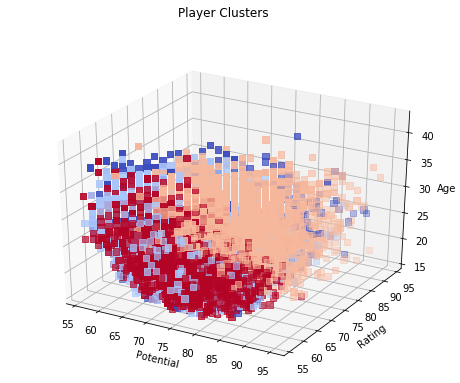

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(players_recent.iloc[:,4], players_recent.iloc[:,3], players_recent.iloc[:,2], marker="s", c=players_recent["cluster"], s=40, cmap = "coolwarm",label = players_recent["cluster"])

fig.suptitle("Player Clusters")
ax.set_xlabel('Potential')
ax.set_ylabel('Rating')
ax.set_zlabel('Age')

plt.show()

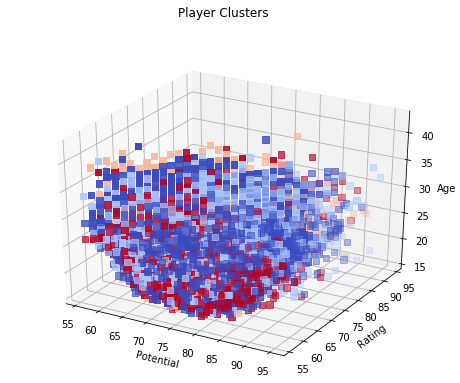

In [44]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(players_recent.iloc[:,4], players_recent.iloc[:,3], players_recent.iloc[:,2], marker="s", c=players_recent["cluster1"], s=40, cmap = "coolwarm",label = players_recent["cluster1"])

fig.suptitle("Player Clusters")
ax.set_xlabel('Potential')
ax.set_ylabel('Rating')
ax.set_zlabel('Age')

plt.show()

In [47]:
kmeans.cluster_centers_

array([[12.49579792,  3.18652377,  2.84600822],
       [ 1.29358007, -3.70448436, -0.34116048],
       [-4.59544601,  0.66386228,  1.79132027],
       [-0.85737195,  1.64053879, -2.41888575]])

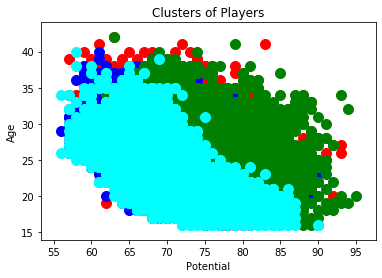

In [62]:
plt.scatter(players_recent.loc[players_recent['cluster']==0, 'Potential'], players_recent.loc[players_recent['cluster']==0, 'Age'], s=100, c='red', label ='Cluster 1')
plt.scatter(players_recent.loc[players_recent['cluster']==1, 'Potential'], players_recent.loc[players_recent['cluster']==1, 'Age'], s=100, c='blue', label ='Cluster 2')
plt.scatter(players_recent.loc[players_recent['cluster']==2, 'Potential'], players_recent.loc[players_recent['cluster']==2, 'Age'], s=100, c='green', label ='Cluster 3')
plt.scatter(players_recent.loc[players_recent['cluster']==3, 'Potential'], players_recent.loc[players_recent['cluster']==3, 'Age'], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Players')
plt.xlabel('Potential')
plt.ylabel('Age')
plt.show()

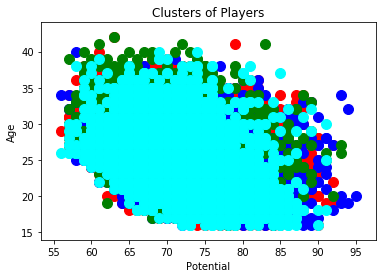

In [61]:
plt.scatter(players_recent.loc[players_recent['cluster1']==0, 'Potential'], players_recent.loc[players_recent['cluster1']==0, 'Age'], s=100, c='red', label ='Cluster 1')
plt.scatter(players_recent.loc[players_recent['cluster1']==1, 'Potential'], players_recent.loc[players_recent['cluster1']==1, 'Age'], s=100, c='blue', label ='Cluster 2')
plt.scatter(players_recent.loc[players_recent['cluster1']==2, 'Potential'], players_recent.loc[players_recent['cluster1']==2, 'Age'], s=100, c='green', label ='Cluster 3')
plt.scatter(players_recent.loc[players_recent['cluster1']==3, 'Potential'], players_recent.loc[players_recent['cluster1']==3, 'Age'], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Players')
plt.xlabel('Potential')
plt.ylabel('Age')
plt.show()